# Iris Flower Species Data Analysis And Prediction With Python
## Created And Done By "Anubhav Kumar Gupta"

### Libraries Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as spy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Acquisition

In [2]:
df_iris=pd.read_csv('/kaggle/input/iris/Iris.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Shape Of Dataset

In [3]:
df_iris.shape

(150, 6)

### First 5 Rows

In [4]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Last 5 Rows

In [5]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Columns Name

In [6]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Check NaN Values

In [7]:
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Information

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Datatypes 

In [9]:
df_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Memory Usage

In [10]:
df_iris.memory_usage()

Index             128
Id               1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

### Descriptive Stats

In [11]:
df_iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Species Valuecounts

In [12]:
df_iris[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Grouping By Species

In [13]:
df_iris_species_group=df_iris.groupby(['Species']).agg({'SepalLengthCm':['max','min','mean','median','std','var'],
'SepalWidthCm':['max','min','mean','median','std','var'],'PetalLengthCm':['max','min','mean','median','std','var'],
'PetalWidthCm':['max','min','mean','median','std','var']})
df_iris_species_group.transpose()

Species               Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm max        5.800000         7.000000        7.900000
              min        4.300000         4.900000        4.900000
              mean       5.006000         5.936000        6.588000
              median     5.000000         5.900000        6.500000
              std        0.352490         0.516171        0.635880
              var        0.124249         0.266433        0.404343
SepalWidthCm  max        4.400000         3.400000        3.800000
              min        2.300000         2.000000        2.200000
              mean       3.418000         2.770000        2.974000
              median     3.400000         2.800000        3.000000
              std        0.381024         0.313798        0.322497
              var        0.145180         0.098469        0.104004
PetalLengthCm max        1.900000         5.100000        6.900000
              min        1.000000         3.000000        4.500000
              mean       1.464000         4.260000        5.552000
              median     1.500000         4.350000        5.550000
              std        0.173511         0.469911        0.551895
              var        0.030106         0.220816        0.304588
PetalWidthCm  max        0.600000         1.800000        2.500000
              min        0.100000         1.000000        1.400000
              mean       0.244000         1.326000        2.026000
              median     0.200000         1.300000        2.000000
              std        0.107210         0.197753        0.274650
              var        0.011494         0.039106        0.075433

### Finding Correlation B/W [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable By Pearson Correlation

In [14]:
print('Correlation b/w SepalLengthCm & SepalWidthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['SepalWidthCm']))
print('Correlation b/w SepalLengthCm & PetalLengthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['PetalLengthCm']))
print('Correlation b/w SepalLengthCm & PetalWidthCm =',spy.pearsonr(df_iris['SepalLengthCm'],df_iris['PetalWidthCm']))
print('Correlation b/w SepalWidthCm & PetalLengthCm =',spy.pearsonr(df_iris['SepalWidthCm'],df_iris['PetalLengthCm']))
print('Correlation b/w SepalWidthCm & PetalWidthCm =',spy.pearsonr(df_iris['SepalWidthCm'],df_iris['PetalWidthCm']))
print('Correlation b/w PetalLengthCm & PetalWidthCm =',spy.pearsonr(df_iris['PetalLengthCm'],df_iris['PetalWidthCm']))

Correlation b/w SepalLengthCm & SepalWidthCm = (-0.10936924995064937, 0.1827652152713699)
Correlation b/w SepalLengthCm & PetalLengthCm = (0.8717541573048713, 1.0384540627941062e-47)
Correlation b/w SepalLengthCm & PetalWidthCm = (0.8179536333691635, 2.3148491512728037e-37)
Correlation b/w SepalWidthCm & PetalLengthCm = (-0.4205160964011545, 8.429366392950231e-08)
Correlation b/w SepalWidthCm & PetalWidthCm = (-0.3565440896138058, 7.523890956067452e-06)
Correlation b/w PetalLengthCm & PetalWidthCm = (0.9627570970509661, 5.776660988496418e-86)


### Boxplot Of [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable

##### For SepalLength

<Axes: ylabel='SepalLengthCm'>

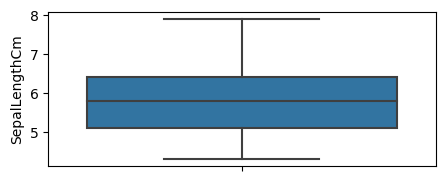

In [15]:
plt.figure(figsize=(5,2))
sns.boxplot(y='SepalLengthCm',data=df_iris)

##### For SepalWidth

<Axes: ylabel='SepalWidthCm'>

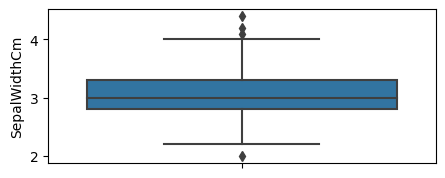

In [16]:
plt.figure(figsize=(5,2))
sns.boxplot(y='SepalWidthCm',data=df_iris)

##### For PetalLength

<Axes: ylabel='PetalLengthCm'>

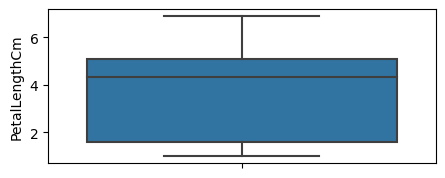

In [17]:
plt.figure(figsize=(5,2))
sns.boxplot(y='PetalLengthCm',data=df_iris)

##### For PetalWidth

<Axes: ylabel='PetalWidthCm'>

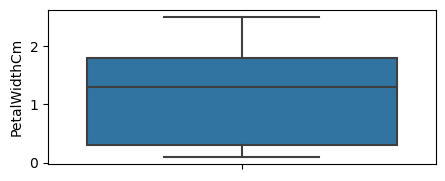

In [18]:
plt.figure(figsize=(5,2))
sns.boxplot(y='PetalWidthCm',data=df_iris)

#### Frequency Plot Of [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] which are Predictor And Independent Variable

##### For SepalLength

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

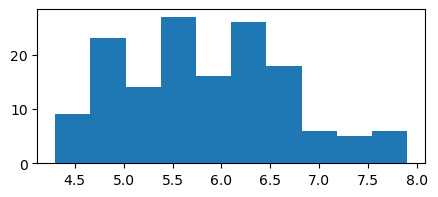

In [19]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['SepalLengthCm'])

##### For Sepalwidth

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

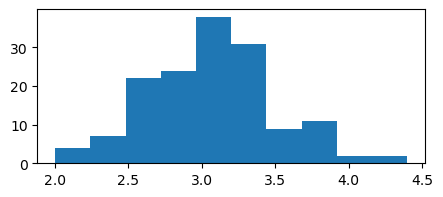

In [20]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['SepalWidthCm'])

##### For PetalLength

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

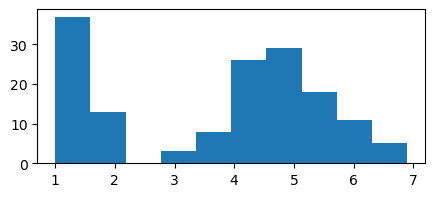

In [21]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['PetalLengthCm'])

##### For PetalWidth

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

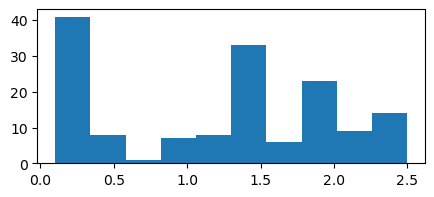

In [22]:
plt.figure(figsize=(5,2))
plt.hist(df_iris['PetalWidthCm'])

### Taking x as Predictor And Independent Variable And Storing Features [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] In It To Predict [['Species']]

In [23]:
x=df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

### Taking y as Target And Dependent Variable And Storing Feature [['Species']] In It

In [24]:
y=df_iris[['Species']]

### Train-Test Split For M.L.

In [25]:
from sklearn.model_selection import train_test_split

### Spliting Dataset 80% For Training And 20% For Testing

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Shape Of Train And Test Dataset

In [27]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


### By Logistic Regression(LR)

In [28]:
from sklearn.linear_model import LogisticRegression

### Fitting Of LR

In [29]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Predicting Species By LR

In [30]:
y_pred_LR=LR.predict(x_test)

### Predicted Species By LR

In [31]:
y_pred_LR

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### Accuracy Score For LR

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred_LR_accuracy=accuracy_score(y_test,y_pred_LR)
y_pred_LR_accuracy

0.9333333333333333

## Regards And Thanks,
### Anubhav Kumar Gupta